In [1]:
import torch

In [2]:
scalar1 = torch.tensor([1.])
print(scalar1)

tensor([1.])


In [5]:
scalar2 = torch.tensor([3.])
print(scalar2)

tensor([3.])


In [7]:
add_scalar = scalar1 + scalar2
print(add_scalar)

tensor([4.])


In [9]:
sub_scalar = scalar1 - scalar2
print(sub_scalar)

tensor([-2.])


In [12]:
torch.add(scalar1, scalar2)

tensor([4.])

## Vector

In [14]:
vector1 = torch.tensor([1., 2., 3.])
vector1

tensor([1., 2., 3.])

In [17]:
vector2 = torch.tensor([4., 5., 6.])
vector2

tensor([4., 5., 6.])

In [18]:
torch.add(vector1, vector2)

tensor([5., 7., 9.])

In [19]:
# 내적
torch.dot(vector1, vector2)

tensor(32.)

## 행렬

In [22]:
matrix1 = torch.tensor([[1.,2.],[3., 4.]])
print(matrix1)

matrix2 = torch.tensor([[5., 6.],
                       [7.,8.]])
print(matrix2)

tensor([[1., 2.],
        [3., 4.]])
tensor([[5., 6.],
        [7., 8.]])


In [23]:
torch.mul(matrix1, matrix2)

tensor([[ 5., 12.],
        [21., 32.]])

In [24]:
# 행렬 곱셈
torch.matmul(matrix1, matrix2)

tensor([[19., 22.],
        [43., 50.]])

## 텐서
+ 행렬을 2차원의 배열이라 표현할 수 있다면, 텐서는 2차원 이상의 배열이라 표현할 수 있음
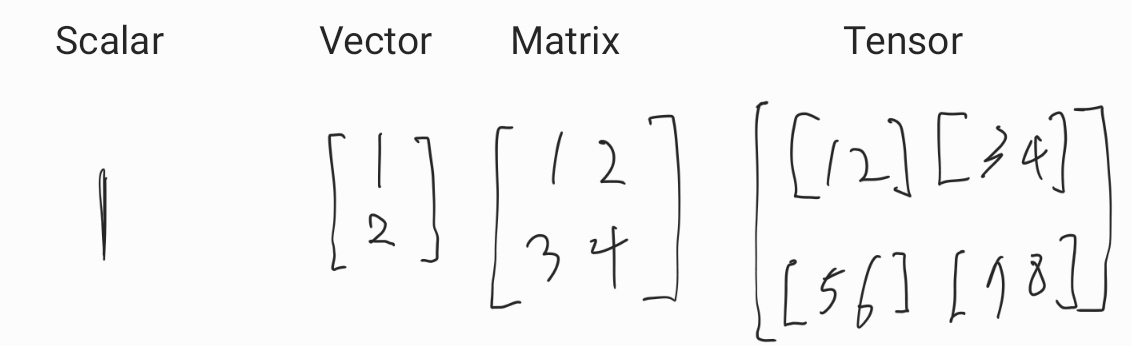

In [25]:
tensor1 = torch.tensor([
                        [[1., 2.], [3., 4.]],
                        [[5., 6.], [7., 8.]],
                        ])

print(tensor1)

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])


In [26]:
tensor2 = torch.tensor([
                        [[9., 10.], [11., 12.]],
                        [[13., 14.], [15., 16.]],
                        ])

print(tensor2)

tensor([[[ 9., 10.],
         [11., 12.]],

        [[13., 14.],
         [15., 16.]]])


In [27]:
sum_tensor = tensor1 + tensor2
print(sum_tensor)

tensor([[[10., 12.],
         [14., 16.]],

        [[18., 20.],
         [22., 24.]]])


In [28]:
# 텐서 곱셈
torch.matmul(tensor1, tensor2)

tensor([[[ 31.,  34.],
         [ 71.,  78.]],

        [[155., 166.],
         [211., 226.]]])

## Autograd
파이토치를 이용해 코드를 작성할 때 Back Propagation을 이용해 파라미터를 업데이트하는 방법은 Autograd 방식으로 쉽게 구현할 수 있도록 설정되어 있음

In [29]:
BATCH_SIZE = 64
INPUT_SIZE = 1000
HIDDEN_SIZE = 100
OUTPUT_SIZE = 10

+ BATCH_SIZE의 수 만큼 데이터를 이용해 Output을 계산하고 배치 수 만큼 출력된 결괏괎에 대한 오차를 계산
+ 배치 사이즈 수만큼 계산된 오찻값을 평균해 Back Propagation에 적용하고 이를 바탕으로 파라미터를 업데이트
+ 이 예제에서 ```BATCH_SIZE = 64``` 이고 Input으로 이용되는 데이터가 64개라는 것을 의미

+ INPUT_SIZE는 딥러닝 모델에서의 Input의 크기 이자 입력층의 노드 수를 의미
+ 이 예제에서 입력 데이터의 크기가 1000이라는 것을 의미
+ 즉, 1000 크기의 벡터 값
+ 배치 사이즈가 64 이므로 1000크기의 벡터 값을 64개 이용한다는 의미
+ (64, 1000)

+ HIDDEN_SIZE는 딥러닝 모델에서의 Input을 다수의 파라미터를 이용해 계산한 결과에 한 번 더 계산되는 파라미터의 수
+ 즉, 입력층에서 은닉층으로 전달됐을 때의 은닉층의 노드 수
+ 이 예제에서는 (64,1000)의 Input들이 (1000, 100) 크기의 행렬과 행렬 곱을 계산하기 위해 설정한 수

+ OUTPUT_SIZE는 딥러닝 모델에서 최종으로 출력되는 값의 벡터의 크기
+ 보통 Output의 크기는 최종으로 비교하고자 하는 레이블의 크기와 동일하게 설정
+ 예를 들어 10개로 분류하려먼 크기가 10인 원-핫 인코딩을 이용하기 때문에 Output의 크기를 10으로 맞추기도 하며 5 크기의 벡터 값에 대해 Mean Squared Error를 계산하기 위해 Output 의 크기를 5로 맞추기도 함

In [43]:
x = torch.randn(BATCH_SIZE,
                INPUT_SIZE,
                dtype = torch.float,
                requires_grad = False)

y = torch.randn(BATCH_SIZE,
                OUTPUT_SIZE,
                dtype = torch.float,
                requires_grad = False)

w1 = torch.randn(INPUT_SIZE,
                 HIDDEN_SIZE,
                dtype = torch.float,
                requires_grad = True)

w2 = torch.randn(HIDDEN_SIZE,
                 OUTPUT_SIZE,
                dtype = torch.float,
                requires_grad = True)

In [44]:
learning_rate = 1e-6 # 1
for t in range(1, 501): 
  y_pred = x.mm(w1).clamp(min=0).mm(w2) # 2

  loss = (y_pred - y).pow(2).sum()
  if t % 100 == 0:
    print("Iteration :", t, "\t", "Loss :", loss.item())
  loss.backward() # 3

  with torch.no_grad(): # 4
    w1 -= learning_rate * w1.grad # 5
    w2 -= learning_rate * w2.grad

    w1.grad.zero_() # 6
    w2.grad.zero_() 

Iteration : 100 	 Loss : 126516.4453125
Iteration : 200 	 Loss : 31261.2578125
Iteration : 300 	 Loss : 11154.3740234375
Iteration : 400 	 Loss : 4766.4775390625
Iteration : 500 	 Loss : 2261.7587890625


1. 딥러닝 모델에서 파라미터 값을 업데이트할 때 가장 중요한 하이퍼파라미터
2. torch 모듈 내 clamp라는 비선형 활성화 함수 적용 -> ReLU와 같은 역할 

 Input과 w1과의 행렬 곱 결과 값에 clamp 함수를 적용한 결괏괎을 다시 w2와 행렬 곱 계산한 결과는 Output을 의미하므로 y_pred
3. 계산된 loss값에 ```backward()```메서드를 이용하면 각 파라미터 값에 대해 Gradient를 계산하고 이를 통해 Back Propagation을 진행한다는 것을 의미
4. 각 파라미터 값에 대해 Gradient를 계산한 결과를 이용해 파라미터 값을 업데이트 할 때는 해당 시점의 Gradient 값을 고정한 후 업데이트를 진행
5. Gradient 값을 고정한 상태에서 w1의 Gradient 값을 의미하는 w1.grad에 학습율을 곱한 결과값을 기존 w1에서 빼줌
6. 각 파라미터 값을 업데이트 했으면 각 파라미터 값의 Gradient를 다시 0으로 초기화 시켜줌



In [45]:
print(w1)

tensor([[ 0.8556,  1.5583,  0.1693,  ..., -0.4312,  1.5635, -1.7445],
        [-1.4194,  0.2194, -1.2673,  ...,  0.3218, -1.0682, -0.2155],
        [ 0.1187, -1.0993, -1.4497,  ...,  1.0653,  0.0234,  0.9131],
        ...,
        [-0.4792,  0.2093,  0.8168,  ..., -0.1605, -0.2166, -1.2376],
        [ 0.0289, -0.5902, -0.1973,  ..., -1.2722,  0.8796,  0.5514],
        [ 1.8463,  0.4558,  0.2944,  ..., -1.2026, -0.1535, -1.1562]],
       requires_grad=True)
